In [1]:
# Método para resolver las energías y eigenfunciones de un sistema cuántico numéricamente
# Modelado Molecular 2
# By: José Manuel Casillas Martín
import numpy as np
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')
import matplotlib.pyplot as plt

In [2]:
# Variables utilizadas
var('x l m hbar w k')

(x, l, m, h̅, w, k)

In [3]:
def Metodo_variaciones():
    print('En este problema están definidas como variables la masa, el parámetro l (se define), el parámetro k(se optimiza) y x')
    print('')
    # La energía cinética está definida por: K=(-hbar**2)/(2*m)*diff(fx,x,2)
    print('La energía cinética esta definida como: K=(-hbar**2)/(2*m)*diff(f(x),x,2)');print('')

    # Declarar el potencial
    V=sympify(input('Introduce la función de potencial: '));print('')
    lim_inf_V=sympify(input('¿Cuál es el límite inferior de la función potencial? '))
    lim_sup_V=sympify(input('¿Cuál es el límite superior de la función potencial? '));print('')

    n = int(input('Introduce el número de funciones que vas a utilizar para resolver el problema: '));print('')
    # Lista para ingresar las funciones
    f=[]
    # Matriz con integral de solapamiento
    Sm=[]
    # Matriz con integral de intercambio
    Hm=[]


    print('Ahora vamos definir las constantes del problema');print('')
    mass=input('¿Cuánto es la masa de tu partícula? ')
    large=input('Define el parámetro l: ');print('')

    # Declarar funciones y límites de dichas funciones
    lim_inf=[]
    lim_sup=[]
    for i in range(n):
        f.append((input('Introduce la función %d: ' %(i+1))))
        lim_inf.append(input('¿Cuál es el límite inferior de la función? '))
        lim_sup.append(input('¿Cuál es el límite superior de la función? '));print('')
    f=sympify(f)
    lim_inf=sympify(lim_inf)
    lim_sup=sympify(lim_sup)
    # Para partícula en un pozo de potencial de 0 a l
    # El siguiente ciclo for resuelve las integrales para formar las matrices Sij (Integrales de solapamiento)
    # y Hij(integrale de intercambio)

    # Aproximación de las energías


    li=0
    ls=0
    for i in range(n):
        for j in range(n):
            integrandoT=(f[i])*((-hbar**2)/(2*m)*diff(f[j],x,2))
            integrandoV=(f[i])*V*(f[j])
            integrandoN=(f[i])*f[j]
            # Definir los limites de integracion

            # Límites inferiores
            if lim_inf[i].subs({l:large})<=lim_inf[j].subs({l:large}):
                li=lim_inf[j]
                if li.subs({l:large})>=lim_inf_V.subs({l:large}):
                    liV=li
                else:
                    liV=lim_inf_V
            if lim_inf[i].subs({l:large})>=lim_inf[j].subs({l:large}):
                li=lim_inf[i]
                if li.subs({l:large})>=lim_inf_V.subs({l:large}):
                    liV=li
                else:
                    liV=lim_inf_V
            # Límites superiores
            if lim_sup[i].subs({l:large})>=lim_sup[j].subs({l:large}):
                ls=lim_sup[j]
                if ls.subs({l:large})<=lim_sup_V.subs({l:large}):
                    lsV=ls
                else:
                    lsV=lim_sup_V
            if lim_sup[i].subs({l:large})<=lim_sup[j].subs({l:large}):
                ls=lim_sup[i]
                ls=lim_sup[j]
                if ls.subs({l:large})<=lim_sup_V.subs({l:large}):
                    lsV=ls
                else:
                    lsV=lim_sup_V

            c=Integral(integrandoT,(x,li,ls))
            e=Integral(integrandoV,(x,liV,lsV))
            g=c+e
            d=Integral(integrandoN,(x,li,ls))
            g=g.doit()
            Hm.append(g)
            d=d.doit()
            Sm.append(d)
    Sm=np.reshape(Sm,(n,n))
    Hm=np.reshape(Hm,(n,n))


    # Matriz M: (Hij-Sij)*w
    M=(Hm-Sm*w)
    H=sympify(Matrix(M))
    Hdet=H.det()
    # Resolver el determinante para encontrar las energías
    E=solve(Hdet,w)


    # Ordenar energías
    Eord=solve(Hdet,w)

    energies=np.zeros(n)

    for i in range (n):
        energies[i]=E[i].subs({m: mass, l: large, hbar:1.0545718e-34})
    energies_ord=sorted(energies)
    for i in range(n):
        for j in range(n):
            if energies[i]==energies_ord[j]:
                Eord[i]=E[j]

    # Matriz de constantes para todas las eigenfunciones
    c=zeros(n)
    for i in range(n):
        for j in range(n):
            c[i,j]=Symbol('c %d %d' %(i+1,j+1))

    # Solución a esas constantes
    sol=[]
    for i in range (n):
        a=np.reshape(c[0+n*i:(n)+n*i],(n))
        SE=Matrix(np.dot(M,a.transpose()))
        SE=sympify((SE.subs({w:Eord[i]})))
        sol.append(solve(SE,c[0+n*i:(n+1)+n*i]))

    if n!= 1:
        csol=zeros(n)
        CTS,cts,Cdet=[],[],[]
        for i in range (n):
            for j in range(n):
                csol[i,j]=(sol[i]).get(c[i,j])
                if csol[i,j] is None:
                    csol[i,j]=c[i,j]
                    CTS.append(c[i,j]); cts.append(c[i,j]); Cdet.append(c[i,j])
    
    # Impresión en pantalla de los resultados
    print('Matriz Hij')
    print(sympify(Matrix(Hm)));print('')
    print('Matriz Sij')
    print(sympify(Matrix(Sm)));print('')
    print('Energías ordenadas')
    print(Eord);print('')
    
    # Normalizar las funciones de onda y graficar
    
    graficar=input('Desea graficar las eigenfunciones calculadas: ');print('')
    if graficar=="si":
        if n>1:
            fa=(np.reshape(f,(n)))
            ef=csol*fa
            for i in range(n):
                integrando=ef[i]*ef[i]
                integ=Integral(integrando,(x,lim_inf[i],lim_sup[i]))
                integ=integ.doit()
                cts[i]=solve(integ-1,Cdet[i])
                if abs(cts[i][0])==cts[0][0]:
                    CTS[i]=cts[i][0]
                else:
                    CTS[i]=cts[i][1]
                ef=ef.subs({Cdet[i]:CTS[i]})
            print('Constantes de cada una de las eigenfunciones (cada eigenfunción tiene una constante extra que se debe normalizar)')
            print(csol);print('')     
            print('Para graficar se normalizaron las constantes mostradas anteriormente, cuyos resultados fueron:')
            print(CTS);print('')
            for i in range(n):
                plot(ef[i].subs({l:1}),xlim=(0,1),ylim=(-2,2),title='Eigenfunción: %d' %(i+1))

        # Falta automatizar los limites de las funciones para graficar y que te grafique la primer función
        if n==1:
            ct=Symbol('C22')
            ef=ct*f[0]
            integrando=(ef)*(ef)
            integ=Integral(integrando,(x,lim_inf[0],lim_sup[0]))
            integr=integ.doit()
            cte=solve(integr-1,ct)
            if cte[0].subs({l:large})>cte[1].subs({l:large}):
                ctr=cte[0]
            else:
                ctr=cte[1]
            ef=ef.subs({ct:ctr})
            #print('Constantes de cada una de las eigenfunciones (cada eigenfunción tiene una constante extra que se debe normalizar)')
            #print(csol);print('')     
            #print('Para graficar se normalizó las constante mostrada anteriormente, cuyo resultado fue:')
            #print(CTS);print('')
            plot(ef.subs({l:1}),xlim=(0,1),ylim=(-1,2))
    return()

En este problema están definidas como variables la masa, el parámetro l (se define), el parámetro k(se optimiza) y x

La energía cinética esta definida como: K=(-hbar**2)/(2*m)*diff(f(x),x,2)

Introduce la función de potencial: 0

¿Cuál es el límite inferior de la función potencial? 0
¿Cuál es el límite superior de la función potencial? 0

Introduce el número de funciones que vas a utilizar para resolver el problema: 4

Ahora vamos definir las constantes del problema

¿Cuánto es la masa de tu partícula? 9.1e-31
Define el parámetro l: 10e-10

Introduce la función 1: x*(l-x)
¿Cuál es el límite inferior de la función? 0
¿Cuál es el límite superior de la función? l

Introduce la función 2: x**2*(l-x)**2
¿Cuál es el límite inferior de la función? 0
¿Cuál es el límite superior de la función? l

Introduce la función 3: x*(l-x)*(1/2*l-x)
¿Cuál es el límite inferior de la función? 0
¿Cuál es el límite superior de la función? l

Introduce la función 4: x**2*(l-x)**2*(1/2*l-x)
¿Cuál es el límite 

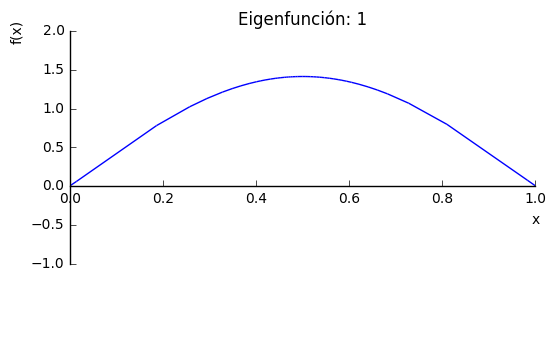

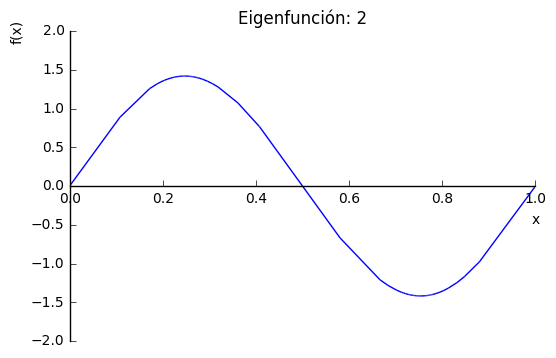

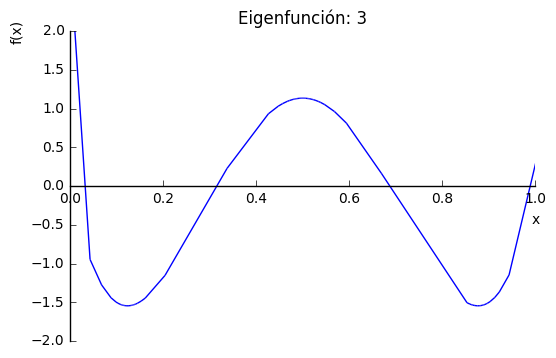

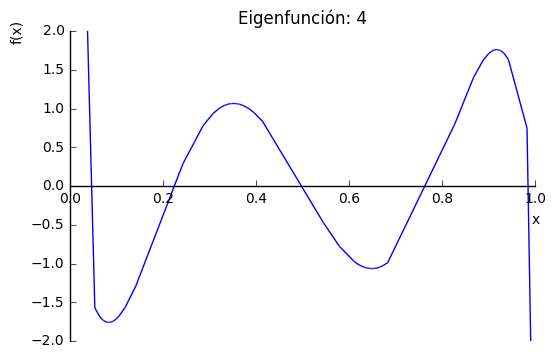

()

In [4]:
Metodo_variaciones()